# **Regression Project: Boston House Price Prediction**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries and overview of the dataset**

In [111]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [112]:
df = pd.read_csv("Boston.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:**

* The price of the house indicated by the variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).

### **Checking the info of the data**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics of this Dataset**

In [114]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observations: The average per capita crime rate per town seems to be very low, however, there are a few areas/locality where crime rate seems to be very high. 
The average proportion of residential land zoned for lots over 25,000 sq.ft. seems to be low, however, half of the houses in Boston suburb or town have no residential land zoned for lots over 25,000 sq.ft. Also, there is/are house(s) that have all residential land zoned for lots over 25,000 sq.ft. 
The average proportion of non-retail business acres per town seems to low, with none of the houses having zero non-retail business acres per town. The maximum non-retail business acres per town is somewhat closer to 30%. 
On average, houses did not bound any rivers, however there was/were house(s) that were bounding river. Almost 75% of the houses covered were not bound by any river. 
The concentration of Nitric Oxide in parts per 10 million seems to be within the safe limit. There are/is house(s) that show larger concentration of Nitric Oxide in parts per 10 million, as compared to others. 
On average, there are almost 6 rooms per dwelling with 75% of the houses having 7 rooms or less per dwelling. There are/is house(s) that were/was having 9 rooms per dwelling. On average, there is 69% percentage of owner-occupied units built before 1940, which can be regarded a a large proportion. There is/are house(s) with all owner-occupied units built before 1940. The age feature is spread quite largely from the average value. 
The average weighted distances to five Boston employment centers is 3.80, however there are/is house(s) with weighted distances to five Boston employment centers equal to 12.13 which can be considered as an outlier.
On average, the index of accessibility to radial highways is almost 9.55, however 75% of the data corresponds to 24 and less, which is also the maximum value. This means that there are large number of houses corresponding to value 24.
On average, the full-value property-tax rate per 10,000 dollars seems to somewhere middle of the minimum (187) and maximum value (711). The 50% of the data is below the average value, which means that there is a large variation in the values between the median and the maximum value i.e. values are more spread between the tax value per 10000 dollars equal to 330 and 711.
On average, the pupil-teacher ratio by town seems to be large (18.45), relative to the maximum value (22). The houses having pupil-teacher ratio by town lower than 18.45 seems to have more spread than the ones above it. The minimum pupil-teacher ratio still seems to be more than 10 i.e 12.
The average % lower status of the population (12.65) seems to be very close to the percentage that corresponds to to the 50% data value i.e. median (11.36). The maximum % (37.97) seems to be an outlier. The data seems to be more spread between the median and the maximum value. 
Lastly, on average, the median value of owner-occupied homes in 1000 dollars (22.53) seems to be very close to the 50% data value i.e. 21.2. The median value of owner-occupied homes in 1000 dollars seems to be more spread between the mean and the maximum value, where the maximum value seems to be an outlier**.

### **Univariate Analysis**

**Let's check the distribution of the variables**

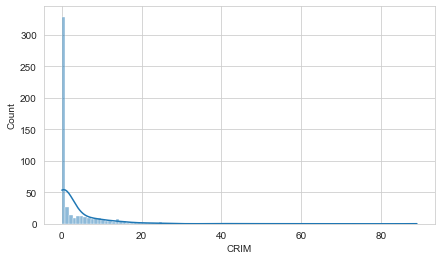

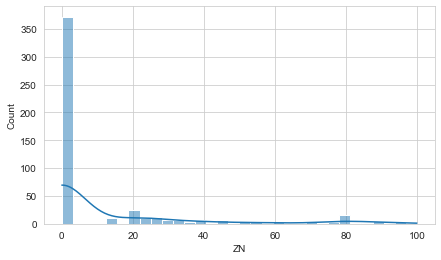

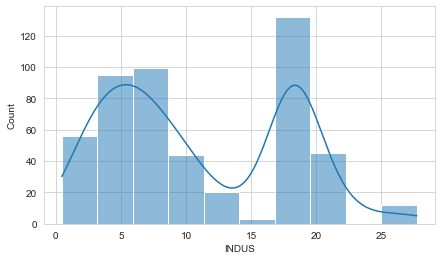

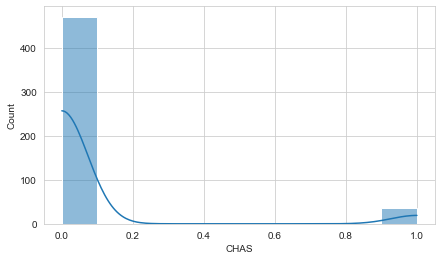

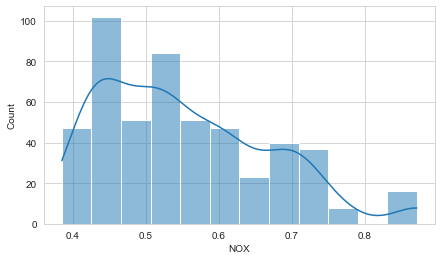

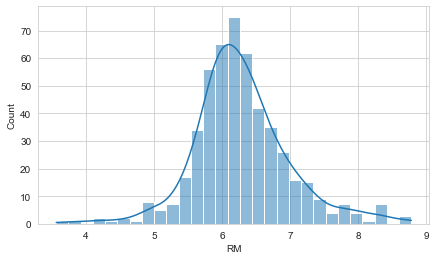

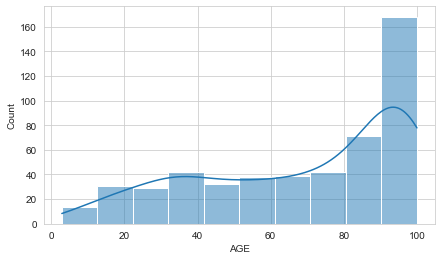

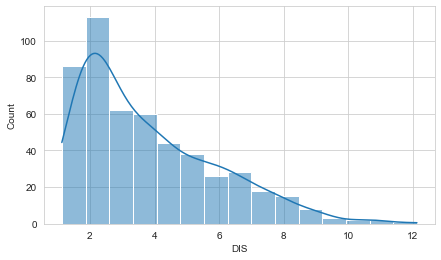

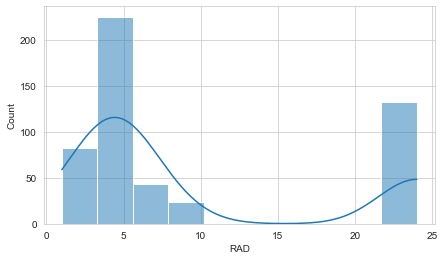

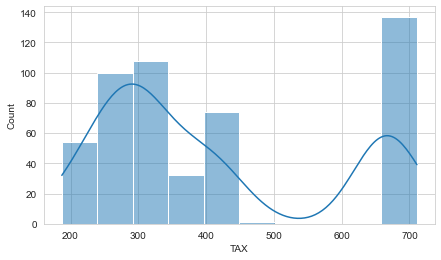

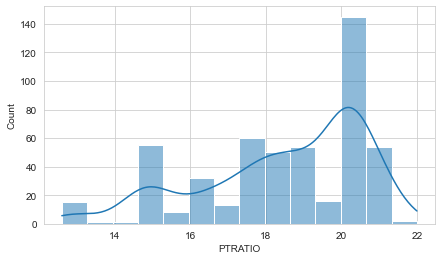

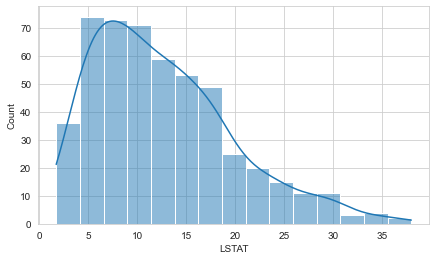

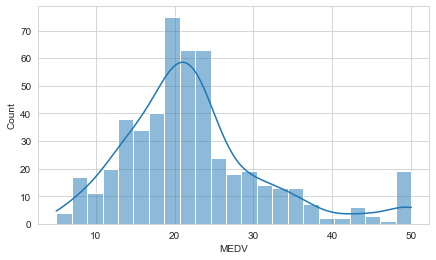

In [115]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

Observations:
- The variable **CRM** is very strongly rightly skewed with a very sharp peak at value equal to zero, followed by a sharp decline as value moves to 100
- The variable **ZN** is again very strongly rightly skewed with a relatively less sharper peak at value equal to zero, followed by a relatively less sharp decline as value moves to 100.
- The variable **INDUS** is following an approx bimodal normal distribution.
- The variable **CHAS** is again rightly skewed as more data points are equal to 0, than 1
- The variable **NOX** seems to be following a multi-modal somewhat of a rightly skewed distribution
- The variable **RM** seems to very accurately resembling the normal distribution
- The variable **AGE** seems to be having a very slightly left skewed distribution
- The variable **DIS** seems to having a strong rightly skewed distribution 
- The variable **RAD** and **TAX** seems to be having a bimodal distribution, resembling no particular defined distribution.
- The variable **PTRATIO** seems to be having a very slightly left skewed distribution.
- The variable **LSTAT** seems to having a moderate rightly skewed distribution
- The vatiable **MEDV** seems to be resembling normal distribution, but it is slightly rightly skewed, along with a another peak near MEDV value equal to 50.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [116]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

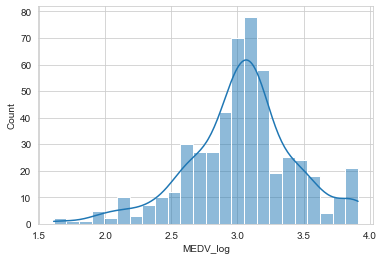

In [117]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

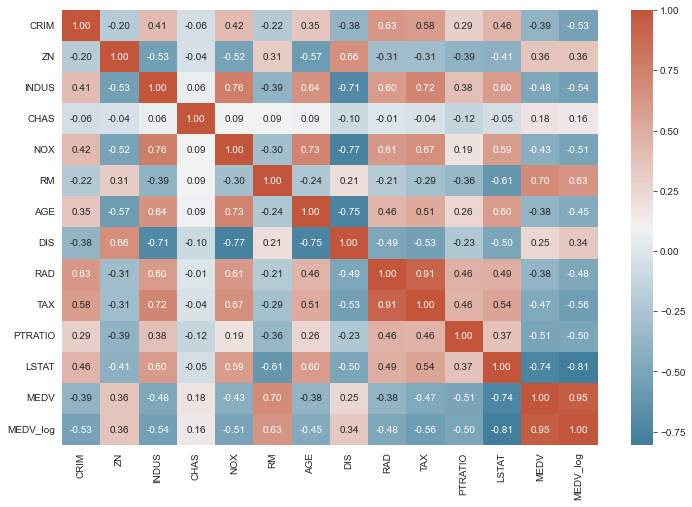

In [118]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations: The heatmap shows that the variables show both positive correlation and negative corelation. TAX v/s RAD  show the highest absolute correlation value of 0.91 indicating that they show the strongest positive relationship out of all other variables in the dataset, implying when value of one of them increases, so does the value of other variable. This correlation value is followed by AGE and DIS that show the second most strongest relationship, with a value of -0.75. This value implies when value of one of them increases, the value of other variable decreases and vice versa. Only variable CHAS, being a dummy variable, seems to have somewhat of a no correlation with all the other variables (values close to zero). The least correlation in magnitude is shown by the variables CHAS and RAD of 0.01, however, excluding CHAS variable, the least correlation is shown by PTRATIO and NOX. There is a strong correlation in both directions i.e. positive and negative**

Now, we will visualize the relationship between the pairs of features having significant correlations.

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

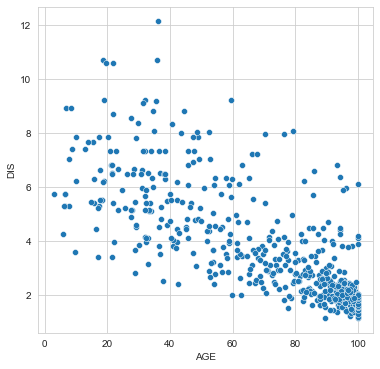

In [119]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

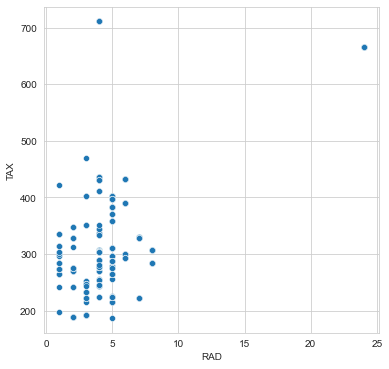

In [120]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
- The strong correlation might be due to outliers. 

Let's check the correlation after removing the outliers.

In [121]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.249757313314292


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

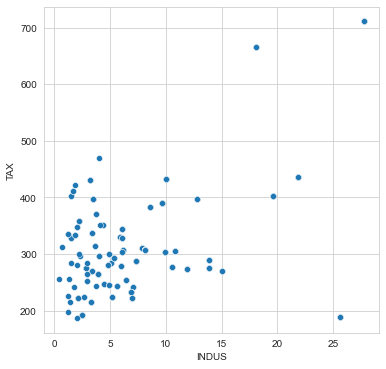

In [122]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

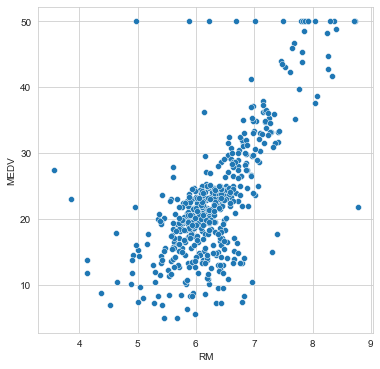

In [123]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

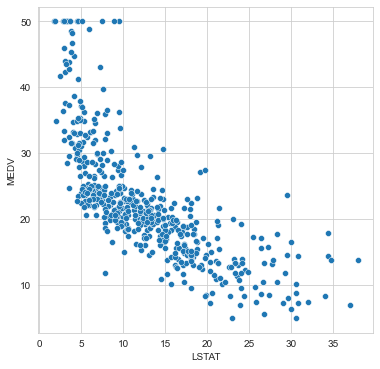

In [124]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

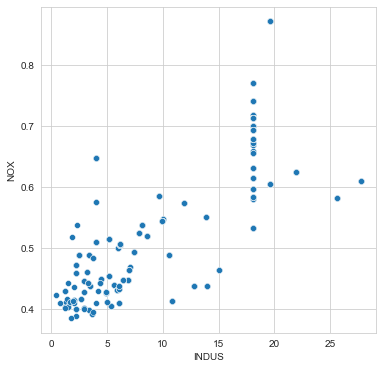

In [125]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

**Observations:We observe a strong positive correlation between INDUS and NOX variables, thus implying that when Proportion of non-retail business acres per town increases, so does the nitric oxide concentration in parts per 10 million. There seems to be a few outliers which might have corresponded to the strong correlation value. INDUS value almost equal to 18 seems to be the mode for the INDUS v/s NOX relationship**

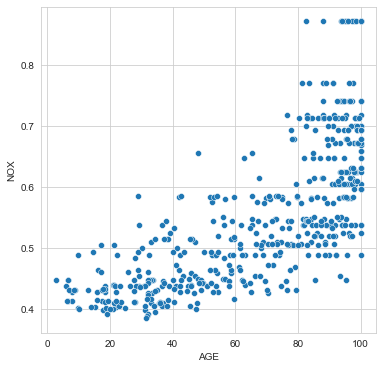

In [126]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

**Observations: We observe a strong positive correlation between AGE and NOX variables, thus implying that when Proportion of owner-occupied units built before 1940 increases, so does the nitric oxide concentration in parts per 10 million. There seems to be a few outliers which might have corresponded to the strong correlation value. There seems to be a few NOX values,that turn out to be same for a certain AGE values. Therefore, the distribution has the possibility of more than 1 modes with more than 1 peak in the distribution curve.** 

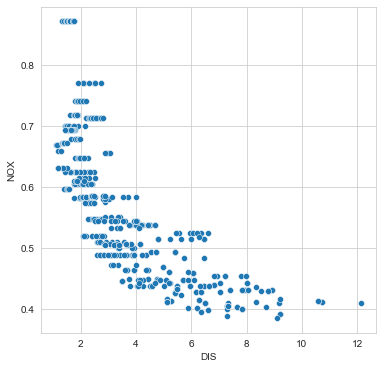

In [127]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

**Observations:We observe a strong negative correlation between DIS and NOX variables, thus implying that when Weighted distances to five Boston employment centers increases,the nitric oxide concentration in parts per 10 million decreases. There seems to be very few outliers which might have corresponded to the strong correlation value. There seems to be a few NOX values,that turn out to be same for a certain DIS values. Therefore, a lot of common values of NOX are shown by different values of weighted distance variable. It is possible that there is a lrge proportion of standard or fixed values of NOX, that correspond to the DIS variable.**

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [128]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [129]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Next, we will check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [131]:
# Create the model after dropping TAX
X_train = X_train.drop("TAX",axis=1)

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

Using the sm.OLS() model on the training data

In [132]:
# Create the model
model1 = sm.OLS(Y, X)
model1_res_0 = model1.fit()

# Get the model summary
model1_res_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     148.5
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          4.58e-155
Time:                        09:12:46   Log-Likelihood:                 122.12
No. Observations:                 506   AIC:                            -218.2
Df Residuals:                     493   BIC:                            -163.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3311      0.198     21.862      0.000       3.942       4.720
CRIM          -0.0109      0.001     -8.203      0.000      -0.013      -0.008
ZN             0.0012      0.001      2.148      0.032       0.000       0.002
INDUS          0.0022      0.002      0.863      0.389      -0.003       0.007
CHAS           0.1077      0.035      3.084      0.002       0.039       0.176
NOX           -0.8224      0.155     -5.320      0.000      -1.126      -0.519
RM             0.0841      0.017      4.986      0.000       0.051       0.117
AGE            0.0003      0.001      0.636      0.525      -0.001       0.001
DIS           -0.0498      0.008     -6.149      0.000      -0.066      -0.034
RAD            0.0135      0.003      5.038      0.000       0.008       0.019
TAX           -0.0006      0.000     -4.203      0.000      -0.001      -0.000
PTRATIO       -0.0376      0.005     -7.085      0.000      -0.048      -0.027
LSTAT         -0.0302      0.002    -14.876      0.000      -0.034      -0.026
==============================================================================
Omnibus:                       50.587   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.279
Skew:                           0.435   Prob(JB):                     4.27e-35
Kurtosis:                       5.598   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations: The **R-squared** value for the model is **0.783**. All the variable seem to be statistically significant in predicting the outcome of the target variable, except **INDUS** and **AGE**, which are shwoing p-value > 0.05. The **adjusted R-squared** value is **0.778**, which seems to be supporting the model, indicating that it is a good fit for the model. The largest coefficients are shown by the feature **NOX** and **CHAS**, which may be the features affecting the target variable the most. **

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [133]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(["MEDV","MEDV_log","TAX","ZN","AGE","INDUS"],axis=1) # Write your code here

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(Y, X).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          2.82e-155
Time:                        09:12:46   Log-Likelihood:                 111.78
No. Observations:                 506   AIC:                            -205.6
Df Residuals:                     497   BIC:                            -167.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2560      0.199     21.348      0.000       3.864       4.648
CRIM          -0.0106      0.001     -7.925      0.000      -0.013      -0.008
CHAS           0.1238      0.035      3.525      0.000       0.055       0.193
NOX           -0.9185      0.141     -6.508      0.000      -1.196      -0.641
RM             0.0958      0.016      5.818      0.000       0.063       0.128
DIS           -0.0452      0.007     -6.804      0.000      -0.058      -0.032
RAD            0.0045      0.002      2.777      0.006       0.001       0.008
PTRATIO       -0.0421      0.005     -8.440      0.000      -0.052      -0.032
LSTAT         -0.0300      0.002    -15.468      0.000      -0.034      -0.026
==============================================================================
Omnibus:                       45.645   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.582
Skew:                           0.374   Prob(JB):                     4.02e-32
Kurtosis:                       5.509   Cond. No.                         685.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will check the linear regression assumptions.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [134]:
residuals = model2.resid

np.mean(residuals)

2.4043130244747954e-15

**Observations: The mean of residuals seems to be very close to zero i.e. very small value. Therefore, this assumption is satisfied.**

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [135]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [136]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(Y,X)

lzip(name, test)

[('F statistic', 3.1091506138988154), ('p-value', 3.088317935728221e-18)]

**Observations: As the p-value is very small i.e. less than 0.05, so we reject the null hupothesis. Therefore, the residuals are heteroscedastic.**

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

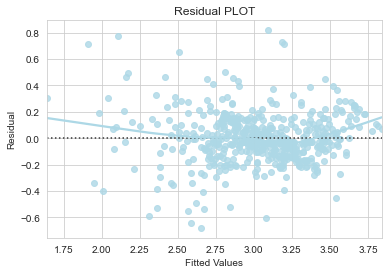

In [137]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:As per the plot, there is no recognizable pattern in the residuals V/S fitted (predicted) values. Therefore, the linearity assumption is satisfied.**

### **4. Normality of error terms**

The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

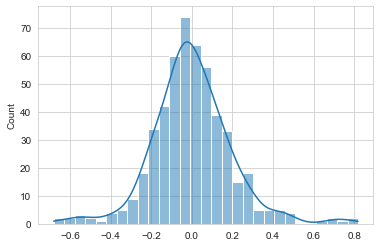

In [138]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

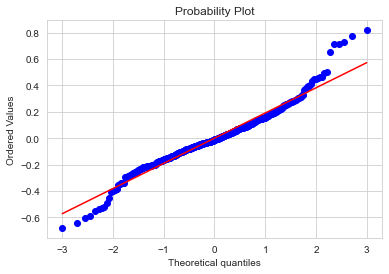

In [139]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations: The data is very close to be approximated as normal distribution as a large portion of the data lies on the straight line of q-q plot, however certain data points on both sides of the middle are above and below the line. It indicates that the assumption might has some issues/errors towards the start and end of the dataset**

### **Check the performance of the model on the train and test data set**

In [140]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.197521  0.140906  4.906079
1   Test  0.185577  0.140547  4.901020


**Observations: The RMSE in Test set improves by almost 1 unit from the Training set, indicating that the accuracy in Test set was improved by 1 percent from 80% to 81%. This means that the model might be underfitting and regularization techniques might have been used. MAE and MAPE remains almost the same for the test and training set. Their values are very samll, which means that model is significantly accurate.**

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [141]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


In [142]:
coefs = model2.params
pd.DataFrame({'Feature' : coefs.index,"Coefs" : coefs.values})

,Feature,Coefs
0,const,4.255994
1,CRIM,-0.010619
2,CHAS,0.123795
3,NOX,-0.918473
4,RM,0.095826
5,DIS,-0.045207
6,RAD,0.004528
7,PTRATIO,-0.042095
8,LSTAT,-0.029971


In [143]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( 4.25599361606804 ) *  const + ( -0.010619278794038983 ) *  CRIM + ( 0.1237949105528281 ) *  CHAS + ( -0.9184732075776573 ) *  NOX + ( 0.09582600951562632 ) *  RM + ( -0.04520684304483713 ) *  DIS + ( 0.004527557101263846 ) *  RAD + ( -0.04209477723666769 ) *  PTRATIO + ( -0.029970727641525988 ) *  LSTAT + 

**Note:** There might be slight variation in the coefficients depending on the library version you are using. There will be no deducting in marks for that as long as your observations are aligned with the output. In case, the coefficients vary too much, please make sure your code is correct.

Initially, we performed the univariate and bivariate analysis on all the variables in the dataset. Then, we commenced the model building process with all the features. We searched the existence of multicollinearity and removed it from the data using Variance InFlation Factor (VIF). Then, we analyzed the model summary report to drop the insignificant features using p-values > 0.05. Next, we confirmed the 4 different assumptions of linear regression. Lastly, we evaluated the model using different evaluation metrics. 

The equation comes out ot be: NOX, 

**$\log ($ Price (Median Value of owner-occupied homes in 1000 dollars) $)$ $= 4.25599 - 0.01062 *$ CRIM$ + 0.12379 *$ CHAS $ - 0.91847 *$ NOX $ + 0.095826 *$ RM$ - 0.045207*$ DIS$  + 0.0045276 *$ RAD $ - 0.042095 *$ PTRATIO$ - 0.029971*$ LSTAT$ \$**

Keeping all the other features constant, if we increase 1 unit in (Nitrix oxide concentration in parts per 10 million), it will result in a decrease of 918.47 dollars
Keeping all the other features constant, if we increase 1 unit in CHAS, (Charles River dummy variable), it will result in a increase of $123.79.
Similarly, this can be interpreted for other features as well. NOX and CHAS seems to be the features having the largest coeficients, thus causing largest change in the price.

Therefore, for the house price to increase, the presence of the bounding river seems to be a key player. A person looking forward to inquiring about the price must ensure what is the locality and inquire about the presence of a bounding river. Similarly, a town or suburb must monitor its nitric oxide concentration as it seems to be playing a crucial part in determining house prices. As we all know that the presence of all types of vehicles around us has increased significantly, which means that the nitric oxide emissions must have increased too, therefore, the house prices must have been affected by that as well. People looking to buy a house in any town or suburb must consider the vehicle inflow and outflow in that particular town or suburb.